##  2.  Linear regression

### 1)  Tensorflow를 이용한 간단한 Linear regression 구현

In [10]:
import tensorflow as tf

x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

#  초기 변수값 설정
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # -1에서 1사이의 값중에 랜덤하게 하나 선택
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# 가설
hypothesis = W * x_data + b

# Cost function
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

# Gradient descent algorithms
alpha = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(cost)

# 모든 변수 초기화
init = tf.initialize_all_variables()

In [6]:
sess = tf.Session()
sess.run(init)

for step in xrange(2001):
    sess.run(train)
    if step % 20 == 0:
        print step, sess.run(cost), sess.run(W), sess.run(b)

0 0.20327 [ 0.60144109] [ 1.10915995]
20 0.0627794 [ 0.7089923] [ 0.66152883]
40 0.0237197 [ 0.82112449] [ 0.40662611]
60 0.00896195 [ 0.89004946] [ 0.24994342]
80 0.00338607 [ 0.93241602] [ 0.15363432]
100 0.00127935 [ 0.95845771] [ 0.09443537]
120 0.000483371 [ 0.97446495] [ 0.05804722]
140 0.00018263 [ 0.98430425] [ 0.03568025]
160 6.90025e-05 [ 0.99035215] [ 0.02193181]
180 2.60715e-05 [ 0.99406976] [ 0.01348099]
200 9.85037e-06 [ 0.99635476] [ 0.00828643]
220 3.72163e-06 [ 0.9977594] [ 0.00509349]
240 1.40616e-06 [ 0.99862278] [ 0.00313083]
260 5.31271e-07 [ 0.99915349] [ 0.00192443]
280 2.00783e-07 [ 0.99947965] [ 0.0011829]
300 7.58031e-08 [ 0.99968016] [ 0.00072709]
320 2.86477e-08 [ 0.99980336] [ 0.00044695]
340 1.08376e-08 [ 0.99987906] [ 0.00027476]
360 4.09102e-09 [ 0.99992567] [ 0.00016894]
380 1.5454e-09 [ 0.99995434] [ 0.00010383]
400 5.82626e-10 [ 0.99997193] [  6.38073398e-05]
420 2.21178e-10 [ 0.99998277] [  3.92184338e-05]
440 8.38488e-11 [ 0.99998939] [  2.40947502e

### 2)  Tensorflow의 placeholder를 이용한 간단한 Linear regression 구현

In [7]:
import tensorflow as tf

x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

#  초기 변수값 설정
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # -1에서 1사이의 값중에 랜덤하게 하나 선택
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

##### placeholder  지정######
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 가설
hypothesis = W * X + b                                          # X 는 언제 정해질까?

# Cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))  #  Y는 언제 정해질까?

# Gradient descent algorithms
alpha = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(cost)

# 모든 변수 초기화
init = tf.initialize_all_variables()

In [8]:
sess = tf.Session()
sess.run(init)

for step in xrange(2001):
    sess.run(train, feed_dict = {X : x_data, Y : y_data})          #  data input
    if step % 20 == 0:
        print step, sess.run(cost, feed_dict = {X : x_data, Y : y_data}), sess.run(W), sess.run(b)

0 0.0716888 [ 1.15015316] [-0.06227669]
20 0.000626626 [ 1.02907372] [-0.06609142]
40 0.000236756 [ 1.0178709] [-0.04062482]
60 8.94524e-05 [ 1.01098478] [-0.0249711]
80 3.37982e-05 [ 1.00675213] [-0.01534913]
100 1.27701e-05 [ 1.00415039] [-0.00943481]
120 4.8248e-06 [ 1.00255108] [-0.00579933]
140 1.82277e-06 [ 1.0015682] [-0.00356473]
160 6.88774e-07 [ 1.00096393] [-0.00219124]
180 2.60225e-07 [ 1.00059247] [-0.00134695]
200 9.83625e-08 [ 1.0003643] [-0.000828]
220 3.71516e-08 [ 1.00022388] [-0.00050894]
240 1.40386e-08 [ 1.00013769] [-0.00031286]
260 5.31004e-09 [ 1.00008464] [-0.00019226]
280 2.00257e-09 [ 1.00005198] [-0.0001181]
300 7.55734e-10 [ 1.00003195] [ -7.25271675e-05]
320 2.8659e-10 [ 1.00001967] [ -4.45884798e-05]
340 1.08481e-10 [ 1.00001204] [ -2.74342601e-05]
360 4.07994e-11 [ 1.00000751] [ -1.69438408e-05]
380 1.524e-11 [ 1.00000465] [ -1.04151468e-05]
400 5.63816e-12 [ 1.00000274] [ -6.38189931e-06]
420 2.25953e-12 [ 1.00000179] [ -3.92221455e-06]
440 1.02792e-12 

-  placeholder를 이용하였기 때문에 **코드 재활용 및 모델 활용**이 가능해짐

In [9]:
print sess.run(hypothesis, feed_dict = {X : 5})
print sess.run(hypothesis, feed_dict={X : 2.5})

[ 5.00000143]
[ 2.50000024]


## 3. Minimizing Cost

### 1)  Cost function  시각화

In [11]:
import tensorflow as tf

X = [1., 2., 3.]
Y = [1., 2., 3.]
m = n_samples = len(x_data)

#  초기 변수값 설정
W = tf.placeholder(tf.float32)

# 가설
hypothesis = tf.mul(X, W)

# Cost function
cost = tf.reduce_sum(tf.pow(hypothesis - Y, 2)) / (m)


# 모든 변수 초기화
init = tf.initialize_all_variables()

# For graphs
W_val = []
cost_val = []

In [12]:
sess = tf.Session()
sess.run(init)
for i in range(-30, 50):
    print i*0.1, sess.run(cost, feed_dict={W : i*0.1})
    W_val.append(i*0.1)
    cost_val.append(sess.run(cost, feed_dict={W: i*0.1}))

-3.0 74.6667
-2.9 70.98
-2.8 67.3867
-2.7 63.8867
-2.6 60.48
-2.5 57.1667
-2.4 53.9467
-2.3 50.82
-2.2 47.7867
-2.1 44.8467
-2.0 42.0
-1.9 39.2467
-1.8 36.5867
-1.7 34.02
-1.6 31.5467
-1.5 29.1667
-1.4 26.88
-1.3 24.6867
-1.2 22.5867
-1.1 20.58
-1.0 18.6667
-0.9 16.8467
-0.8 15.12
-0.7 13.4867
-0.6 11.9467
-0.5 10.5
-0.4 9.14667
-0.3 7.88667
-0.2 6.72
-0.1 5.64667
0.0 4.66667
0.1 3.78
0.2 2.98667
0.3 2.28667
0.4 1.68
0.5 1.16667
0.6 0.746667
0.7 0.42
0.8 0.186667
0.9 0.0466667
1.0 0.0
1.1 0.0466667
1.2 0.186667
1.3 0.42
1.4 0.746666
1.5 1.16667
1.6 1.68
1.7 2.28667
1.8 2.98667
1.9 3.78
2.0 4.66667
2.1 5.64667
2.2 6.72
2.3 7.88667
2.4 9.14667
2.5 10.5
2.6 11.9467
2.7 13.4867
2.8 15.12
2.9 16.8467
3.0 18.6667
3.1 20.58
3.2 22.5867
3.3 24.6867
3.4 26.88
3.5 29.1667
3.6 31.5467
3.7 34.02
3.8 36.5867
3.9 39.2467
4.0 42.0
4.1 44.8467
4.2 47.7867
4.3 50.82
4.4 53.9467
4.5 57.1667
4.6 60.48
4.7 63.8867
4.8 67.3867
4.9 70.98


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


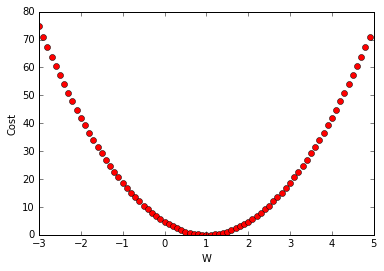

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost')
plt.xlabel('W')
plt.show()

### 2)  Tensorflow를 이용한 GDS 알고리즘  직접 구현 

In [15]:
import tensorflow as tf

x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

W = tf.Variable(tf.random_uniform([1], -10.0, 10.0))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W*X 

cost = tf.reduce_mean(tf.square(hypothesis - Y))

descent = W - tf.mul(0.1, tf.reduce_mean(tf.mul((tf.mul(W, X) - Y), X)))
update = W.assign(descent)

init = tf.initialize_all_variables()

In [16]:
sess = tf.Session()
sess.run(init)

for step in xrange(20):
    sess.run(update, feed_dict={X : x_data, Y : y_data})
    print step, sess.run(cost, feed_dict={X : x_data, Y : y_data}), sess.run(W)

0 82.474 [ 5.20392609]
1 23.4593 [ 3.2420938]
2 6.67286 [ 2.19578338]
3 1.89806 [ 1.6377511]
4 0.539892 [ 1.34013391]
5 0.153569 [ 1.18140471]
6 0.0436819 [ 1.09674919]
7 0.0124251 [ 1.05159962]
8 0.00353426 [ 1.02751982]
9 0.00100531 [ 1.01467729]
10 0.000285955 [ 1.00782788]
11 8.13372e-05 [ 1.00417483]
12 2.3136e-05 [ 1.00222659]
13 6.58143e-06 [ 1.00118756]
14 1.87215e-06 [ 1.00063336]
15 5.32631e-07 [ 1.00033784]
16 1.51368e-07 [ 1.00018013]
17 4.30821e-08 [ 1.00009608]
18 1.22621e-08 [ 1.00005126]
19 3.48426e-09 [ 1.0000273]
